# Decision Trees and Methods
Chapter 8 of ISL

Let's start off with a thought experiemtn to give some motivation behind using a decision tree method.

Imagine I play Tennis every Saturday and I always invite a friend to come with me.

Sometimes, my friend shows up, sometimes not.

For him, it depends on a variety of factors, such as:
- weather
- temperature
- humidity
- wind

I start tracking these features and wheter or not he shows up to play Tennis with me

<img src = "https://nullpointerexception1.files.wordpress.com/2017/11/screen-shot-2017-11-26-at-1-42-53-pm-e1511684839854.png?w=736">

I want to use this data to determine whether or not my friend will show up to play

An intuitive way to do this is through a Decision Tree

<img src = "https://nullpointerexception1.files.wordpress.com/2017/11/decision-tree-e1513448957591.jpg?w=952">

In this tree, we have:
- Nodes
    - Split for the values of a certain attribute
- Edges
    - Outcome of a split to next node
- Root
    - The node that performs the first split
- Leaves
    - Terminal nodes that predict the outcome
    
## Random Forests

To improve performance, we can use many trees with a random sample of features chosen as the split.

- A new random sample of features is chosen for __every single tree at every single split__.
- For classification, m is typically chosen to be the square root of p.

What's the point?

Suppose there is __one very strong feature__ in the data set. When using "bagged" trees, most of the trees will use that feature as the top split, resulting in an ensemble of smaller trees that are __highly correlated__. Averaging highly correlated quantities does not significantly reduce variance. By randomly leaving out candidate features from each split, __Random Forests "decorrelates" the trees__, such that the averaging process can reduce the variance of the resulting model.

In [4]:
# install.packages('rpart')
library(rpart)
help(rpart)

In [7]:
str(kyphosis)
head(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


,Kyphosis,Age,Number,Start
,<fct>,<int>,<int>,<int>
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15
6,absent,1,2,16


In [13]:
tree <- rpart(Kyphosis ~ . , method = 'class', data = kyphosis)

In [16]:
printcp(tree)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error xerror    xstd
1 0.176471      0   1.00000 1.0000 0.21559
2 0.019608      1   0.82353 1.1765 0.22829
3 0.010000      4   0.76471 1.1765 0.22829


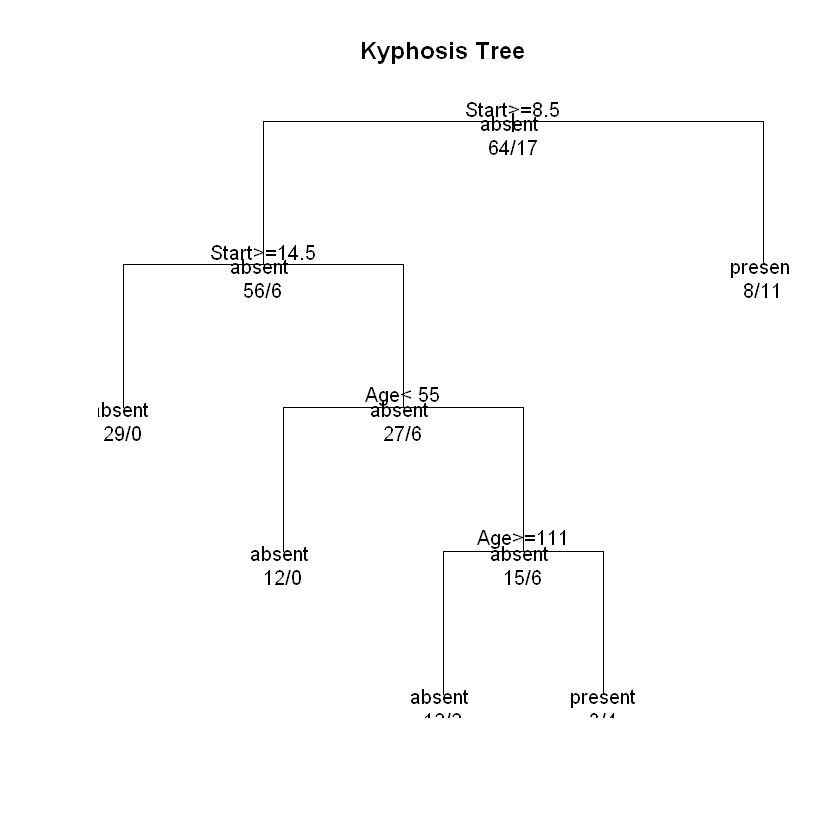

In [22]:
plot(tree, uniform = T, main = 'Kyphosis Tree')
text(tree, use.n = T, all = T)

In [25]:
# install.packages('rpart.plot')
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

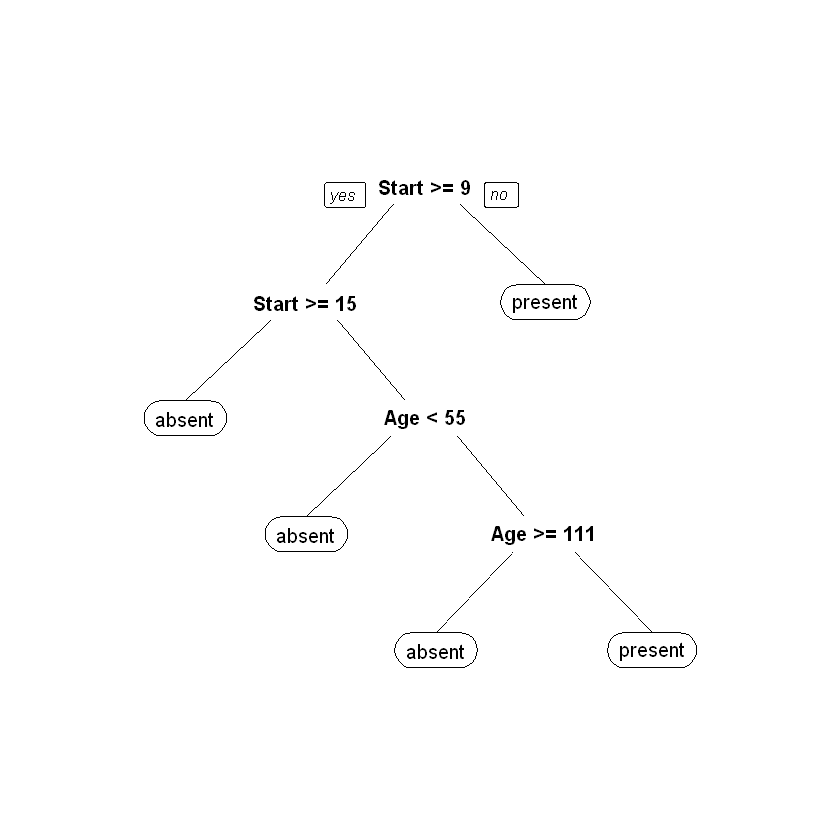

In [26]:
prp(tree)

In [30]:
# install.packages('randomForest')
library(randomForest)

In [33]:
rf.model <- randomForest(Kyphosis ~ . , data = kyphosis)
print(rf.model)


Call:
 randomForest(formula = Kyphosis ~ ., data = kyphosis) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 20.99%
Confusion matrix:
        absent present class.error
absent      59       5   0.0781250
present     12       5   0.7058824
